# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [79]:
import pandas as pd
import numpy as np
from palmerpenguins import load_penguins
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from plotnine import *

In [4]:
data = load_penguins()
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [10]:
data.dropna(inplace=True)
ct = ColumnTransformer(
    [('dummify', OneHotEncoder(sparse_output=False), ['sex', 'island', 'species']),
    ('standardize', StandardScaler(), ['body_mass_g', 'bill_length_mm', 'flipper_length_mm'])
    ],
    remainder = 'drop'
)

lr_pipeline = Pipeline(
    [('preprocessing', ct),
    ('regresssion', LinearRegression())]
)

lr_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('dummify',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['sex', 'island', 'species']),
                                                 ('standardize',
                                                  StandardScaler(),
                                                  ['body_mass_g',
                                                   'bill_length_mm',
                                                   'flipper_length_mm'])])),
                ('regresssion', LinearRegression())])

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [90]:
X = data.drop('bill_depth_mm', axis=1)
y = data['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y)

lr_fit = lr_pipeline.fit(X_train, y_train)

y_train_pred = lr_fit.predict(X_train)
y_test_pred = lr_fit.predict(X_test)

mod1_mse_test = mean_squared_error(y_test_pred, y_test)
mod1_mse_train = mean_squared_error(y_train_pred, y_train)
mod1_mse_test

0.6049143585328992

In [56]:
ct = ColumnTransformer(
    [
        ('dummify', OneHotEncoder(sparse_output=False), ['island']),
        ('standardize', StandardScaler(), ['body_mass_g'])
    ],
    remainder = 'drop'
)

lr_pipeline = Pipeline(
    [
        ('preprocessing', ct),
        ('regression', LinearRegression())
    ]
)

X = data[['body_mass_g', 'island']]
y = data['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y)

lr_fit = lr_pipeline.fit(X_train, y_train)

y_train_pred = lr_fit.predict(X_train)
y_test_pred = lr_fit.predict(X_test)

mod2_mse_test = mean_squared_error(y_test_pred, y_test)
mod2_mse_train = mean_squared_error(y_train_pred, y_train)
mod2_mse_test

1.985715519173311

In [53]:
ct = ColumnTransformer(
    [
        ('dummify', OneHotEncoder(sparse_output=False), ['sex', 'island']),
        ('standardize', StandardScaler(), ['flipper_length_mm'])
    ]
)

lr_pipeline = Pipeline(
    [
        ('preprocessing', ct),
        ('regression', LinearRegression())
    ]
)

X = data[['sex', 'island', 'flipper_length_mm']]
y = data['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y)

lr_fit = lr_pipeline.fit(X_train, y_train)


y_test_pred = lr_fit.predict(X_test)
y_train_pred = lr_fit.predict(X_train)

mod3_mse_test = mean_squared_error(y_test_pred, y_test)
mod3_mse_train = mean_squared_error(y_train_pred, y_train)

mod3_mse_test

1.268308795401521

In [76]:
ct = ColumnTransformer(
    [
        ('dummify', OneHotEncoder(sparse_output=False), ['sex', 'island', 'species']),
        ('standardize', StandardScaler(), ['flipper_length_mm', 'bill_length_mm'])
    ]
)

lr_pipeline = Pipeline(
    [
        ('preprocessing', ct),
        ('regression', LinearRegression())
    ]
)

X = data[['sex', 'island', 'flipper_length_mm', 'bill_length_mm', 'species']]
y = data['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y)

lr_fit = lr_pipeline.fit(X_train, y_train)

y_pred_train = lr_fit.predict(X_train)
y_pred_test = lr_fit.predict(X_test)

mod4_mse_test = mean_squared_error(y_test_pred, y_test)
mod4_mse_train = mean_squared_error(y_train_pred, y_train)

mod4_mse_test

4.979836754685054

In [91]:
mse_data = {
    'Model': ["Model 1", "Model 2","Model 3","Model 4",],
    'Number of Predictors': [7,2,3,5],
    'MSE Train': [mod1_mse_train,mod2_mse_train,mod3_mse_train,mod4_mse_train],
    'MSE Test': [mod1_mse_test,mod2_mse_test,mod3_mse_test,mod4_mse_test]
}

mydata = pd.DataFrame(mse_data)
mydata.head()

model_df = pd.melt(mydata, id_vars=['Model','Number of Predictors'], value_vars=['MSE Train', 'MSE Test'], var_name='Data', value_name='MSE')
model_df

,Model,Number of Predictors,Data,MSE
0,Model 1,7,MSE Train,0.650603
1,Model 2,2,MSE Train,2.420437
2,Model 3,3,MSE Train,1.194863
3,Model 4,5,MSE Train,5.489899
4,Model 1,7,MSE Test,0.604914
5,Model 2,2,MSE Test,1.985716
6,Model 3,3,MSE Test,1.268309
7,Model 4,5,MSE Test,4.979837


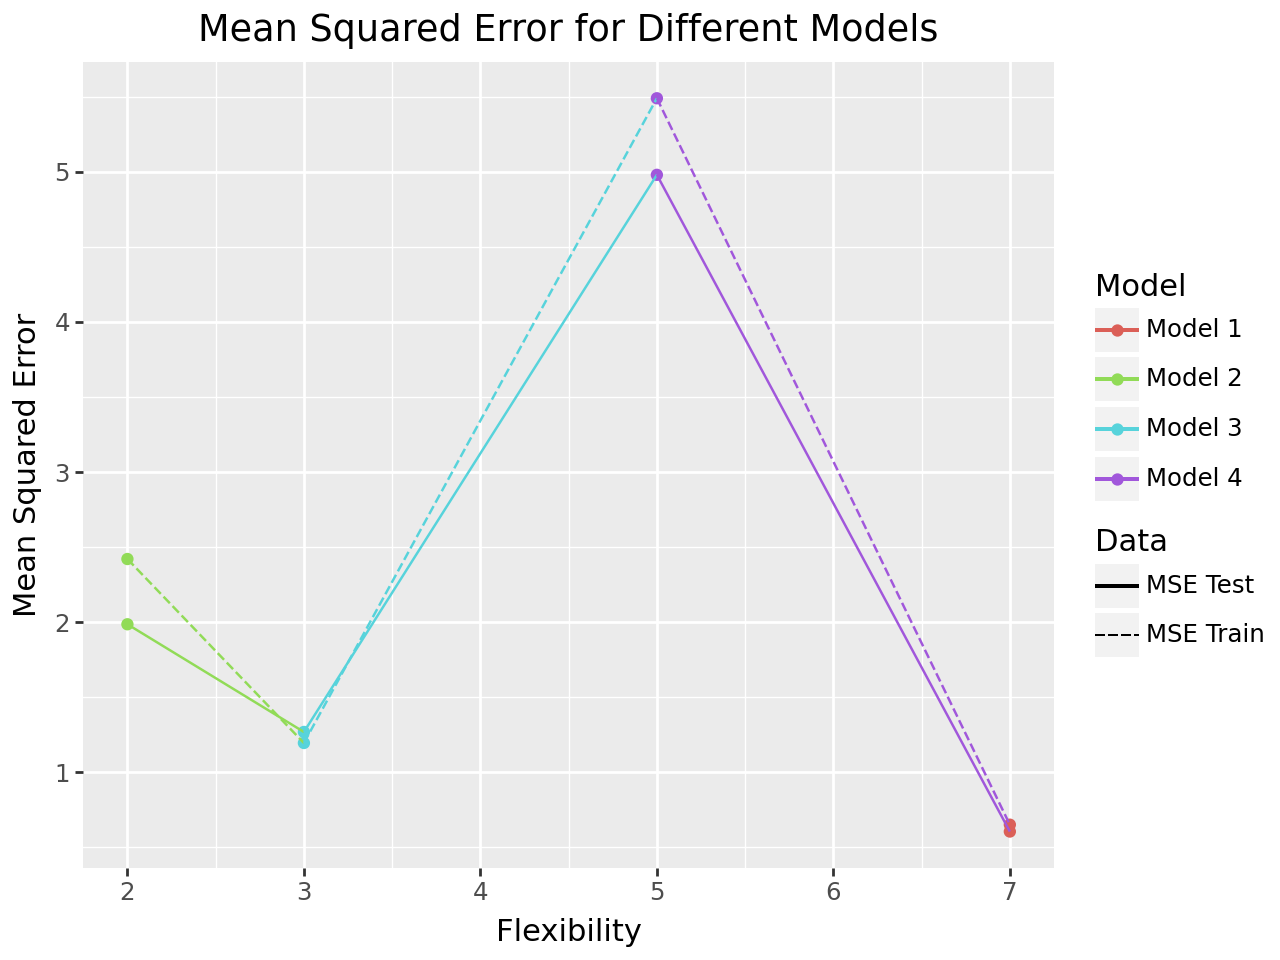

In [95]:
(ggplot(model_df, aes(x='Number of Predictors', y='MSE', color='Model', group='Data', linetype='Data')) +
geom_point() +
geom_line() +
labs(title = "Mean Squared Error for Different Models",
           x= 'Flexibility',
           y='Mean Squared Error')

)

As seen above, Model 1 and Model 3 give us the best prediction for the data set. This is seen by their low values of mean squared error for both the training and test data sets. If we had to pick just one, we can see that Model 1 has the lowerst values of MSE for both the training and test data. This makes sense because Model 1 includes all of the variables in the data set for the predictors.